# Three ducks strat

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv("../data/BTCUSDT-volume-bars.csv")
df = df.set_index(pd.to_datetime(df.time)).drop(["time"], axis=1)

In [3]:
df = df[-1_000_000:]

In [90]:
fast_window = 10_000
medium_window = 100_000
slow_window = 400_000

df0 = (pd.DataFrame()
            .assign(price=df.close)
            .assign(fast=df.close.ewm(fast_window).mean())
            .assign(medium=df.close.ewm(medium_window).mean())
            .assign(slow=df.close.ewm(slow_window).mean()))
df0

,price,fast,medium,slow
time,,,,
2021-04-22 23:55:23.894,48800.00,48800.000000,48800.000000,48800.000000
2021-04-22 23:55:23.895,48800.00,48800.000000,48800.000000,48800.000000
2021-04-22 23:55:23.898,48800.00,48800.000000,48800.000000,48800.000000
2021-04-22 23:55:25.319,48795.23,48798.807321,48798.807482,48798.807496
2021-04-22 23:55:29.496,48814.42,48801.930481,48801.930048,48801.930012
...,...,...,...,...
2021-06-19 09:27:04.502,35841.54,36217.885522,37397.177010,39046.078905
2021-06-19 09:27:20.667,35823.32,36217.846069,37397.161271,39046.070128
2021-06-19 09:27:26.627,35826.83,36217.806972,37397.145567,39046.061360


In [91]:
def get_up_cross(df):
    crit1 = df.price > df.medium.shift(1) 
    crit2 = df.price > df.slow.shift(1)
    crit3 = df.price.shift(1) < df.fast.shift(1)
    crit4 = df.price >= df.fast

    return df.price[(crit1) & (crit2) & (crit3) & (crit4)]

def get_down_cross(df):
    crit1 = df.price < df.medium.shift(1) 
    crit2 = df.price < df.slow.shift(1)
    crit3 = df.price.shift(1) > df.fast.shift(1)
    crit4 = df.price <= df.fast

    return df.price[(crit1) & (crit2) & (crit3) & (crit4)]

up = get_up_cross(df0)
down = get_down_cross(df0)

In [92]:
side_up = pd.Series(1, index=up.index)
side_down = pd.Series(-1, index=down.index)
side = pd.concat([side_up,side_down]).sort_index()
side

time
2021-04-22 23:55:29.496    1
2021-04-22 23:55:41.025   -1
2021-04-22 23:55:44.167    1
2021-04-22 23:55:53.783   -1
2021-04-22 23:56:02.048    1
                          ..
2021-06-19 07:40:07.270   -1
2021-06-19 07:59:14.762   -1
2021-06-19 08:00:16.007   -1
2021-06-19 08:03:06.398   -1
2021-06-19 08:03:14.264   -1
Length: 1777, dtype: int64

## Plotting

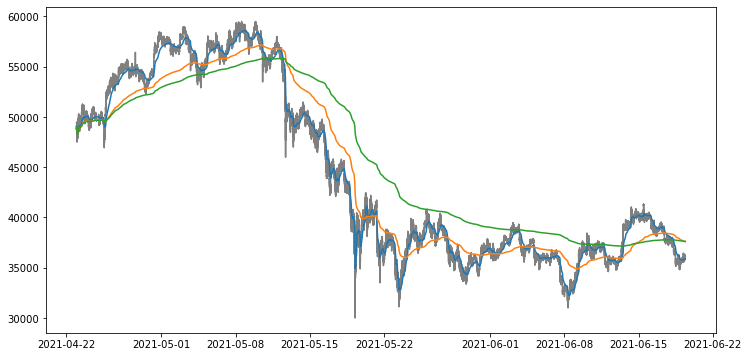

In [66]:
plot = df0[:]

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(plot.price, color = "gray")
ax.plot(plot.fast)
ax.plot(plot.medium)
ax.plot(plot.slow)

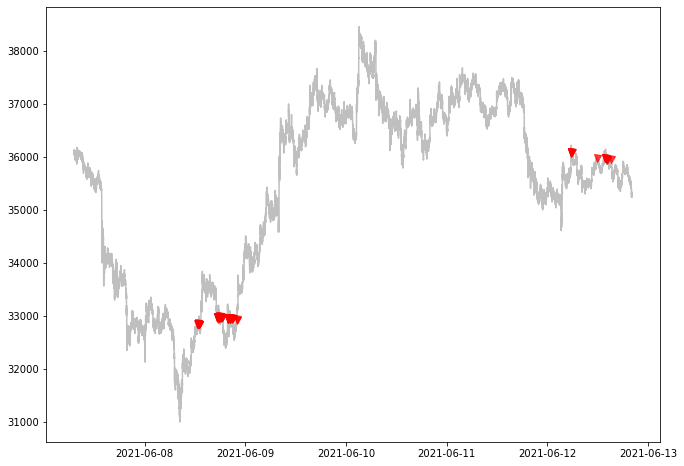

In [97]:
plot = df0
plot["up"] = up
plot["down"] = down
plot = plot[-200000:-100000]

fig, ax = plt.subplots(figsize=(11,8))

# close_df.loc['2014':].plot(ax=ax, alpha=.5)
ax.plot(plot.price, alpha=.5, color="gray")

ax.plot(plot.up, marker='^', markersize=7,
                     alpha=0.75, label='upcross', color='g')

ax.plot(plot.down, marker='v', markersize=7,
                     alpha=0.75, label='upcross', color='r')


